# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Functions for simulation
from MMn import simulate_MMn
from MMn_SJF import simulate_MMn_SJF
from MDn import simulate_MDn
from MLn import simulate_MLn

# Functions used for analysis
from Analysis import *

# Constant Parameters

In [2]:
customers = 100000

# Problem 2  

# Problem 3

Average waiting time: 2.9624947259854104 +- 0.07000972189022912


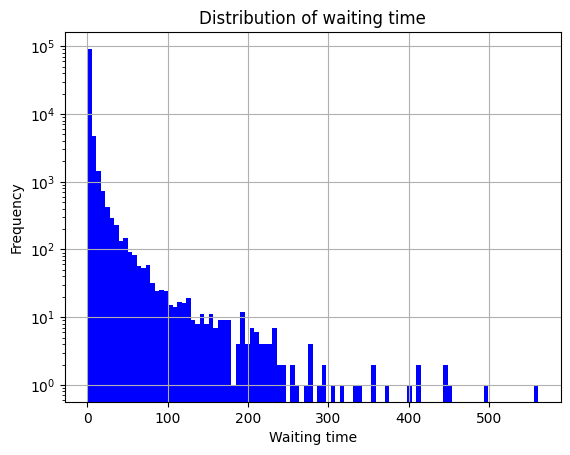

In [3]:
# Parameters
mu = 1
rho = 0.9
n = 1

# Get the waiting times
waiting = simulate_MMn_SJF(customers, rho, mu)

# Mean and confidence interval
wait_avg, wait_conf = statistics(waiting)

# Plotting
fig, ax = visualize(waiting, 'Distribution of waiting time', yscaling='log')

# Problem 4
### M/D/n

Average waiting time: 4.61003199715694 +- 0.030673663346673253
Average waiting time: 4.4211626890473 +- 0.028277827053277655
Average waiting time: 4.483692311495561 +- 0.029697981286042674


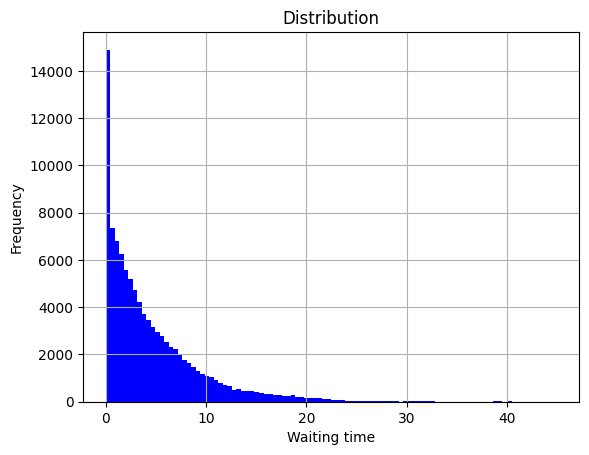

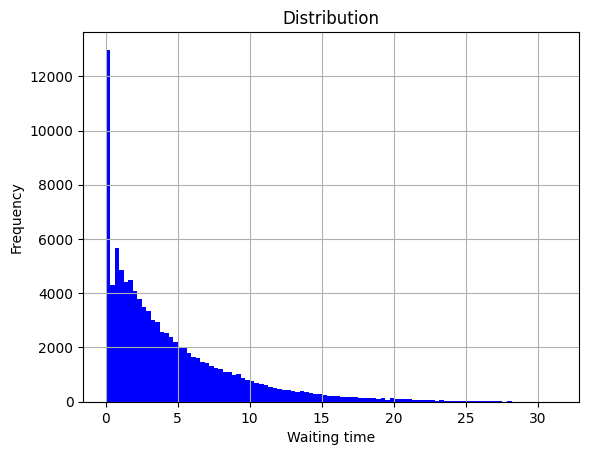

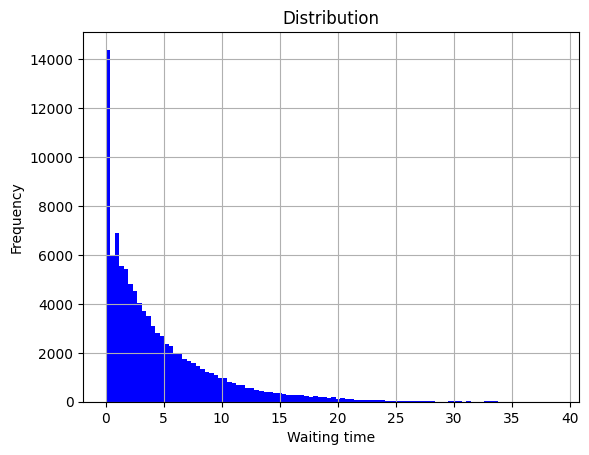

In [4]:
# Compare M/D/1 with M/D/n
ns = [1, 2, 4]
for n in ns:
    W = simulate_MDn(customers, rho, mu, 1)
    statistics(W)
    fig, ax = visualize(W, 'Distribution')

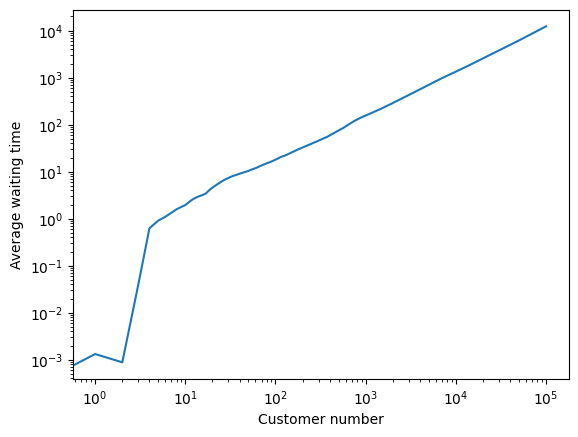

In [5]:
# How does the average waiting time change with customer number
mu = [1, 5]
p = 0.75
w = simulate_MLn(customers, rho, mu, p, 1, seed=42)

# Get means
waiting_means = np.cumsum(w) / np.arange(1, customers + 1)

plt.ylabel('Average waiting time')
plt.xlabel('Customer number')
plt.plot(waiting_means)
plt.xscale('log')
plt.yscale('log')
plt.show()

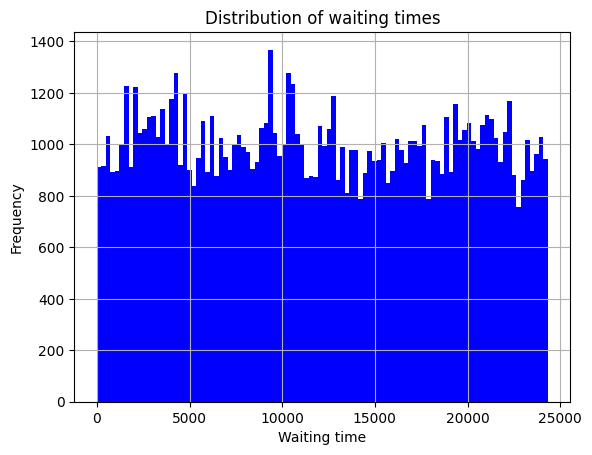

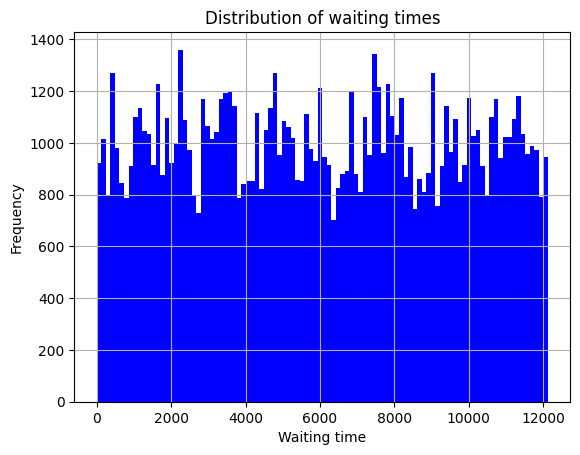

In [6]:
# Show the distributions of waiting times in M/L/1 and M/L/n
waiting = simulate_MLn(customers, rho, mu, p, 1)
fig, ax = visualize(waiting)

waiting = simulate_MLn(customers, rho, mu, p, 2)
fig, ax = visualize(waiting)

When service times follow a long-tail distribution, a phenomenon may arise where the average waiting time increases with the total number of customers, even if the overall system load $\rho$ is less than one. This occurrence is primarily attributable to the characteristics of the long-tail distribution.

#### Characteristics of Long-Tail Distribution
A long-tail distribution, especially in the context of service times, implies that while most services might be relatively brief, a significant portion of them could be exceedingly lengthy. This distribution is characterized by high variance, indicating substantial fluctuations in service times.

In the given example, 75% of service times follow an exponential distribution with $\lambda=1$, while 25% follow an exponential distribution with $\lambda=0.2$. The latter's average service time is five times that of the former, signifying that a considerable number of service instances will occupy an extensive amount of time.

#### Scenario with System Load Less Than 1
Even with an overall system load less than one, the long-tail distribution of service times can lead to queue instability and increased waiting times due to:

- **Occasional Extended Service Times**: Infrequent occurrences of prolonged service times can lead to sudden queue build-ups, despite the service rate being adequate to handle incoming customers most of the time.

- **High Variance and Unpredictability**: The long-tail distribution heightens the unpredictability of service times, potentially leading to unexpectedly high waiting times even under seemingly "safe" average load levels.

- **Instantaneous Load Exceeding 1**: Although the average load may be less than one, specific instances of prolonged service times can result in instantaneous loads exceeding one, rapidly escalating queue lengths.

#### Conclusion
Consequently, under circumstances where service times adhere to a long-tail distribution, average waiting times may increase with the total number of customers, even if the average load is less than one. This underscores the necessity of considering the characteristics of service time distributions in the design and management of such systems, rather than solely focusing on the average service rate. In practical applications, additional measures, such as augmenting service capacity or introducing priority rules, might be required to mitigate the effects of the long-tail distribution.